# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1

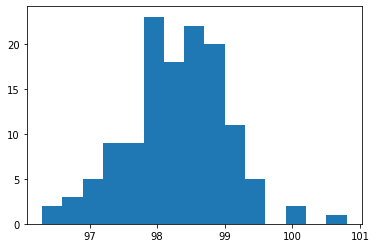

In [3]:
_ = plt.hist(df['temperature'], bins=15)
# The distribution of body temperatures is roughly normal and n > 30

In [4]:
max = df['temperature'].max()
min = df['temperature'].min()

print(max, min)

100.8 96.3


# 2

randomness - The data is assumed to have been obtained from a random group of people  
independence - Assuming a sample size of 13, the observations will be independent since it represents less than 10% of the
               population  
normal - We assume that the sampling distribution is normal since the parent population is roughly normal



In [5]:
df.shape

(130, 3)

# 3

Null Hypothesis: the true population mean really is 98.6 F  
Alternative Hypothesis: the true population mean does not equal 98.6 F  
alpha = 0.05

For this this test, I will be using a one-sample Z-test. One-sample because there is only one population being dealt with and we are using the T-test because we are dealing with a mean value as opposed to proportions.

In [6]:
n = df.shape[0]
sample = np.random.choice(df['temperature'], size=n)
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print('sample mean = ', sample_mean)
print('sample std = ', sample_std)

sample mean =  98.2176923076923
sample std =  0.7679608748663201


In [7]:
import scipy.stats as t
z = (sample_mean - 98.6)/ (sample_std/ np.sqrt(n))
print('z score = ', z)
print('p = ',t.norm.cdf(z)*2)

z score =  -5.6760422289933645
p =  1.3784676288723546e-08


Since the p-value is greater than the threshold, we would not reject the null hypothesis and that the mean temperature really is 98.6 F

# 4

In [8]:
n = 10
sample = np.random.choice(df['temperature'], size=n)
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print('sample mean = ', sample_mean)
print('sample std = ', sample_std)

z = (sample_mean - 98.6)/ (sample_std/ np.sqrt(n))
print('z score = ', z)
print('p = ',t.norm.cdf(z)*2)

sample mean =  98.48
sample std =  0.9282241108697834
z score =  -0.4088164859934453
p =  0.682674340484405


In [9]:
t = z
print('T-statistic =', t )
#print('p = ',t.cdf(t)*2)

T-statistic = -0.4088164859934453


According to the T-table the above value, with 9 degrees of freedom, and for a two tailed test corresponds to value of 2.262 therefore we can reject the null hypothesis. The correct test to use for a sample size of 10 would be the T-test because of the small sample size.

# 5

In [10]:
import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
mean_confidence_interval(df['temperature'], confidence=0.95)

(98.24923076923075, 98.12200290560801, 98.37645863285348)

I would consider anything below 98.12 or anything higher than 98.37 degrees to be abnormal according to the 95% confidence interval

# 6

Is there a significant difference between males and females in normal temperature?

    What testing approach did you use and why?
    Write a story with your conclusion in the context of the original problem. 

+ Null Hypothesis: There is no difference between males and females in body temperature (f_mean - m_mean =0)
+ Alternative Hypothesis: There is a difference between males and females in body temperature (f_mean - m_mean !=0)

In [11]:
f = df.temperature[df.gender=='F']
m = df.temperature[df.gender=='M']
n = 10

f_sample = np.random.choice(f, size=n)
f_sample_mean = np.mean(f_sample)
f_sample_std = np.std(f_sample)

m_sample = np.random.choice(m, size=n)
m_sample_mean = np.mean(m_sample)
m_sample_std = np.std(m_sample)

mean_diff = f_sample_mean - m_sample_mean

t_stat = mean_diff / np.sqrt((f_sample_std**2/n) + (m_sample_std**2/n))
t_stat

2.0324763096138803

In [14]:
from scipy.stats import t
1 -t.cdf(t_stat, 9)

0.036321591175938917

since the p-value is less than 0.05 we will reject the null hypothesis and conclude that male and females have a different mean boday temperature